In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [167]:
import pandas as pd
import os

In [208]:
df_red = pd.read_csv('/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_red.txt', delimiter= ' ', names= ['fname', 'conf', 'xmin', 'ymin', 'xmax', 'ymax'])

In [209]:
df_red['class'] = ['red'] * len(df_red)

In [210]:
df_red.head(5)

,fname,conf,xmin,ymin,xmax,ymax,class
0,0b560e12ad75741267575d4d53db7a2b,0.586959,232,92,241,111,red
1,0b560e12ad75741267575d4d53db7a2b,0.294760,236,142,242,154,red
2,0b560e12ad75741267575d4d53db7a2b,0.036378,278,142,283,154,red
3,0b560e12ad75741267575d4d53db7a2b,0.035758,238,141,246,149,red
4,0b560e12ad75741267575d4d53db7a2b,0.034397,235,139,243,146,red


In [211]:
df_green = pd.read_csv('/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_green.txt', delimiter= ' ', names= ['fname', 'conf', 'xmin', 'ymin', 'xmax', 'ymax'])

In [212]:
df_green['class'] = ['green']*len(df_green)

In [213]:
df_concat = pd.concat([df_red,df_green])

In [214]:
df_concat.sort_values('conf', ascending=False, inplace=True)

In [215]:
to_plot = df_concat[df_concat['conf'] >= 0.5]

In [216]:
to_plot = to_plot.sort_values('fname')

In [217]:
final_plot = to_plot.reset_index(drop=True)

In [191]:
import pickle

In [218]:
pickle.dump(final_plot, open('Final_dets_to_plot_yolo608.pkl', 'wb'))

In [219]:
final_plot.head(5)

,fname,conf,xmin,ymin,xmax,ymax,class
0,000df8537bcd8c757d4d51cf8bff5b7b,0.996535,341,35,355,60,red
1,000df8537bcd8c757d4d51cf8bff5b7b,0.895212,230,27,243,53,red
2,00287b10d691d22c371726ad4b274744,0.794511,293,116,303,138,red
3,0066e66c88dd3afde487a1c74cfc0da3,0.619320,139,30,149,51,red
4,00792b9e831e506369229aeb0cb622a8,0.584950,217,69,224,82,green


In [220]:
final_plot['class'].shape

(468,)

In [221]:
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
index = 0
red = [colors[0], colors[2]]
green = [colors[8], colors[8]]

processed 100 images
processed 200 images
processed 300 images


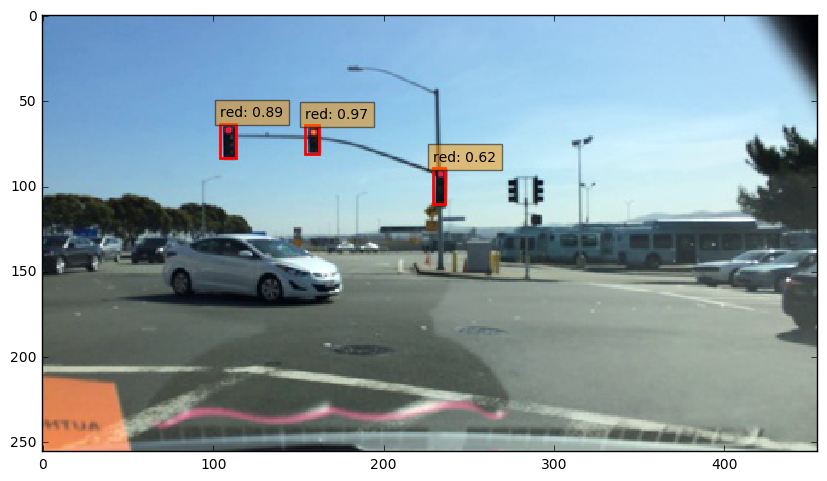

In [222]:
plt.rcParams['figure.figsize'] = (10, 10)
while(index < len(final_plot)):
    fname = final_plot['fname'][index]
    dets = final_plot[final_plot['fname'] == fname]
    try:
        im = plt.imread(image_path+fname+'.jpg')
        plt.imshow(im)
        currentAxis = plt.gca()
        #print fname
        for new_index in range(len(dets)):
            dets.reset_index(drop=True, inplace=True)
            _, cname, score = dets['fname'][new_index], dets['class'][new_index], dets['conf'][new_index]
            bbox = [dets['xmin'][new_index], dets['ymin'][new_index], dets['xmax'][new_index], dets['ymax'][new_index]]
            xmin = int(round(float(bbox[0])))
            ymin = int(round(float(bbox[1])))
            xmax = int(round(float(bbox[2])))
            ymax = int(round(float(bbox[3])))
            coords = (xmin, ymin), xmax-xmin-1, ymax-ymin-1
            #score = round(float(score),2)
            disp_text = cname + ': '+'{0:.2f}'.format(float(score))
            if cname == 'red':
                colors = red
            else:
                colors = green
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=colors[0], linewidth=2))
            currentAxis.text(xmin, ymin-4, disp_text, bbox={'facecolor':colors[1], 'alpha':0.5})
        currentAxis.hold(False)
        save_path = os.path.join('/home/saikiran/HBRS/RD/libs_installed/dets/',fname+'.jpg')
        plt.savefig(save_path, bbox_inches='tight')
        
    except:
        index = index + len(dets)
        if index == len(final_plot) - 1:
            break
        else:
            continue
    index = index + len(dets)
    if index % 100 == 0:
        print "processed %d images"% index
    

In [136]:
index

632

In [153]:
final_plot[final_plot['fname'] == final_plot['fname'][629]]

,fname,conf,xmin,ymin,xmax,ymax,class
629,fff380015e5e28c27a207c24bb64eae2,0.812460,103.383476,63.047298,114.512779,85.159637,red
630,fff380015e5e28c27a207c24bb64eae2,0.781888,155.864105,64.505829,165.707184,84.210098,red
631,fff380015e5e28c27a207c24bb64eae2,0.800486,229.309021,88.302078,239.914276,112.859131,red


In [125]:
dets['fname'][2], dets['class'][2], dets['conf'][2]

('00287b10d691d22c371726ad4b274744', 'red', 0.78016600000000003)

In [113]:
dets

,fname,conf,xmin,ymin,xmax,ymax,class
0,000df8537bcd8c757d4d51cf8bff5b7b,0.845007,229.289459,27.627644,244.135620,55.029896,red
1,000df8537bcd8c757d4d51cf8bff5b7b,0.862286,342.183594,34.488377,356.482483,61.118771,red


In [33]:
df_green.shape, df_red.shape, df_merged.shape, df_concat.shape

((492, 6), (1039, 6), (1358, 11), (1531, 6))

In [63]:
final_plot[final_plot['fname'] == final_plot['fname'][0]].ix[0,'xmin':'ymax']

xmin    229.289
ymin    27.6276
xmax    244.136
ymax    55.0299
Name: 0, dtype: object

In [2]:
image_path = '/home/saikiran/HBRS/RD/actual_data/images/'

In [3]:
red_detections = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_red.txt'
green_detections = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_green.txt'

In [1]:
with open(red_detections) as red_file:
    for line in red_file:
        fname, prob, bbox = line.split()[0], line.split()[1], line.split()[2:]
        if prob > 0.25:
            xmin = int(round(float(bbox[0])))
            ymin = int(round(float(bbox[1])))
            xmax = int(round(float(bbox[2])))
            ymax = int(round(float(bbox[3])))
            coords = (xmin, ymin), xmax-xmin, ymax-ymin
            
            plt.imshow(image_path+fname+'.jpg')
            

NameError: name 'red_detections' is not defined

In [74]:
line = '0b560e12ad75741267575d4d53db7a2b 0.841962 234.009476 92.850502 241.550430 112.464958'

In [75]:
fname, prob, bbox = line.split()[0], line.split()[1], (line.split()[2:])

In [76]:
print bbox 

['234.009476', '92.850502', '241.550430', '112.464958']


In [77]:
xmin = int(round(float(bbox[0])))
ymin = int(round(float(bbox[1])))
xmax = int(round(float(bbox[2])))
ymax = int(round(float(bbox[3])))

In [78]:
coords = (xmin, ymin), xmax-xmin, ymax-ymin

In [25]:
coords = (int(bbox[0]), int(bbox[1])), int(bbox[2])-int(bbox[0])+1, int(bbox[3])-int(bbox[1])+1

ValueError: invalid literal for int() with base 10: '234.009476'

In [242]:
im.shape

NameError: name 'im' is not defined

In [79]:
score = round(float(prob),2)

In [80]:
disp_text = 'red: '+'{0:.2f}'.format(float(prob))

In [81]:
print disp_text

red: 0.84


In [3]:
import cv2

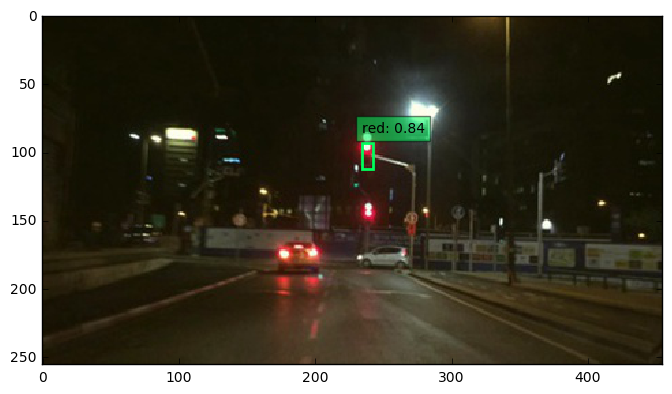

In [102]:
im = plt.imread(image_path+fname+'.jpg')
plt.imshow(im)
currentAxis = plt.gca()
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=colors[8], linewidth=2))
currentAxis.text(xmin, ymin-8, disp_text, bbox={'facecolor':colors[8], 'alpha':0.5})

In [30]:
coords

((106474, 23770), 3432, 5022)

In [65]:
im = cv2.imread(image_path+fname+'.jpg')

In [66]:
cv2.rectangle(im, (xmin,ymin), (xmax, ymax), (255,0,0), 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, 'red', (xmin,ymin), font, 0.5,(0,0,255),1)

In [56]:
xmin

234

In [67]:
cv2.imshow('im',im )
cv2.waitKey(0)

10

In [ ]:
cv2.destroyAllWindows()
for i in range(5):
    cv2.waitKey(3)

In [13]:
import numpy as np

In [74]:
colors

[[1.0, 0.0, 0.0, 1.0],
 [1.0, 0.2779414544120426, 0.0, 1.0],
 [1.0, 0.5790446966917554, 0.0, 1.0],
 [1.0, 0.8801479389714684, 0.0, 1.0],
 [0.8187488187488188, 1.0, 0.0, 1.0],
 [0.5176455764691059, 1.0, 0.0, 1.0],
 [0.23970412205706326, 1.0, 0.0, 1.0],
 [0.0003669599257835228, 1.0, 0.061766080148432954, 1.0],
 [0.0, 1.0, 0.3625004724974957, 1.0],
 [0.0, 1.0, 0.6636018178368361, 1.0],
 [0.0, 1.0, 0.9647031631761764, 1.0],
 [0.0, 0.7573556047820753, 1.0, 1.0],
 [0.0, 0.4562523625023627, 1.0, 1.0],
 [0.0, 0.15514912022264993, 1.0, 1.0],
 [0.14595412205706287, 0.0, 1.0, 1.0],
 [0.44705736433677606, 0.0, 1.0, 1.0],
 [0.724998818748819, 0.0, 1.0, 1.0],
 [0.9878673536761773, 0.0, 0.9617652926476454, 1.0],
 [1.0, 0.0, 0.6727946966917553, 1.0],
 [1.0, 0.0, 0.37169145441204254, 1.0],
 [1.0, 0.0, 0.09375, 1.0]]

In [9]:
# Chunk of code to get the list of files where there are both classes in validation set
common_list = []
with open(green_detections, 'r') as green:
        for each_line in green:
            g_fname = each_line.split()[0]
            with open(red_detections, 'r') as red:
                for r_each_line in red:
                    r_fname = r_each_line.split()[0]
                    if g_fname.strip() == r_fname.strip() and g_fname not in common_list:
                        common_list.append(g_fname)

#### A chunk of code to copy test labels to a folder called test_labels

In [25]:
from shutil import copyfile

In [26]:
annotations_path = '/home/saikiran/HBRS/RD/actual_data/labels/'
test_file = '/home/saikiran/HBRS/RD/actual_data/results/test.txt'
dst_path = '/home/saikiran/HBRS/RD/actual_data/test_labels/'

In [28]:
with open(test_file, 'r') as test:
    for line in test:
        f_name = line.split('/')[-1].strip().split('.')[0]
        copyfile(annotations_path+f_name+'.xml', dst_path+f_name+'.xml')

#### The filenames in the test file must contain only image file names one per line, hence the below chunk of code does it.

In [36]:
new_test_file = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
with open(test_file, 'r') as test:
    with open(new_test_file, 'w') as new_test:
        for line in test:
            f_name = line.split('/')[-1].strip().split('.')[0]
            new_test.write(f_name+'\n')
    new_test.close()

## Code for ROC curves and class wise map vlaues

In [1]:
import xml.etree.ElementTree as ET
import os
import cPickle
import numpy as np



def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects

def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

def voc_eval(detpath,
             annopath,
             imagesetfile,
             classname,
             cachedir,
             ovthresh=0.5,
             use_07_metric=False):
    """rec, prec, ap = voc_eval(detpath,
                                annopath,
                                imagesetfile,
                                classname,
                                [ovthresh],
                                [use_07_metric])

    Top level function that does the PASCAL VOC evaluation.

    detpath: Path to detections
        detpath.format(classname) should produce the detection results file.
    annopath: Path to annotations
        annopath.format(imagename) should be the xml annotations file.
    imagesetfile: Text file containing the list of images, one image per line.
    classname: Category name (duh)
    cachedir: Directory for caching the annotations
    [ovthresh]: Overlap threshold (default = 0.5)
    [use_07_metric]: Whether to use VOC07's 11 point AP computation
        (default False)
    """
    # assumes detections are in detpath.format(classname)
    # assumes annotations are in annopath.format(imagename)
    # assumes imagesetfile is a text file with each line an image name
    # cachedir caches the annotations in a pickle file

    # first load gt
    if not os.path.isdir(cachedir):
        os.mkdir(cachedir)
    cachefile = os.path.join(cachedir, 'annots.pkl')
    # read list of images
    with open(imagesetfile, 'r') as f:
        lines = f.readlines()
    imagenames = [x.strip() for x in lines]

    if not os.path.isfile(cachefile):
        # load annots
        recs = {}
        for i, imagename in enumerate(imagenames):
            #print imagename, annopath.format(imagename)
            #recs[imagename] = parse_rec(annopath.format(imagename))
            recs[imagename] = parse_rec(annopath+imagename+'.xml')
            if i % 100 == 0:
                print 'Reading annotation for {:d}/{:d}'.format(
                    i + 1, len(imagenames))
        # save
        print 'Saving cached annotations to {:s}'.format(cachefile)
        with open(cachefile, 'w') as f:
            cPickle.dump(recs, f)
    else:
        # load
        with open(cachefile, 'r') as f:
            recs = cPickle.load(f)

    # extract gt objects for this class
    class_recs = {}
    npos = 0
    for imagename in imagenames:
        R = [obj for obj in recs[imagename] if obj['name'] == classname]
        bbox = np.array([x['bbox'] for x in R])
        difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
        det = [False] * len(R)
        npos = npos + sum(~difficult)
        class_recs[imagename] = {'bbox': bbox,
                                 'difficult': difficult,
                                 'det': det}

    # read dets
    detfile = detpath.format(classname)
    with open(detfile, 'r') as f:
        lines = f.readlines()

    splitlines = [x.strip().split(' ') for x in lines]
    image_ids = [x[0] for x in splitlines]
    confidence = np.array([float(x[1]) for x in splitlines])
    BB = np.array([[float(z) for z in x[2:]] for x in splitlines])

    # sort by confidence
    sorted_ind = np.argsort(-confidence)
    sorted_scores = np.sort(-confidence)
    BB = BB[sorted_ind, :]
    image_ids = [image_ids[x] for x in sorted_ind]

    # go down dets and mark TPs and FPs
    nd = len(image_ids)
    tp = np.zeros(nd)
    fp = np.zeros(nd)
    for d in range(nd):
        R = class_recs[image_ids[d]]
        bb = BB[d, :].astype(float)
        ovmax = -np.inf
        BBGT = R['bbox'].astype(float)

        if BBGT.size > 0:
            # compute overlaps
            # intersection
            ixmin = np.maximum(BBGT[:, 0], bb[0])
            iymin = np.maximum(BBGT[:, 1], bb[1])
            ixmax = np.minimum(BBGT[:, 2], bb[2])
            iymax = np.minimum(BBGT[:, 3], bb[3])
            iw = np.maximum(ixmax - ixmin + 1., 0.)
            ih = np.maximum(iymax - iymin + 1., 0.)
            inters = iw * ih

            # union
            uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                   (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                   (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)

            overlaps = inters / uni
            ovmax = np.max(overlaps)
            jmax = np.argmax(overlaps)

        if ovmax > ovthresh:
            if not R['difficult'][jmax]:
                if not R['det'][jmax]:
                    tp[d] = 1.
                    R['det'][jmax] = 1
                else:
                    fp[d] = 1.
        else:
            fp[d] = 1.

    # compute precision recall
    tp_array = tp
    fp_array = fp
    fp = np.cumsum(fp)
    tp = np.cumsum(tp)
    rec = tp / float(npos)
    # avoid divide by zero in case the first detection matches a difficult
    # ground truth
    prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
    ap = voc_ap(rec, prec, use_07_metric)

    return rec, prec, ap, tp, fp

In [167]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_red.txt'

rec_r, prec_r, ap_r, tp_yolo_r, fp_yolo_r   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [47]:
ap_r

0.92406961027241707

#### For class green

In [168]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/cgreendir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/comp4_det_test_green.txt'

rec_g, prec_g, ap_g, tp_yolo_g, fp_yolo_g = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [49]:
ap_g

0.93139522812730613

In [51]:
(ap_r+ap_g)/2

0.9277324191998616

#### For SSD

In [2]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_red.txt'

rec_r, prec_r, ap_r,tp_array_ssdr, fp_array_ssdr = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [3]:
ap_r

0.89268416362486336

In [4]:
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_green.txt'

rec_g, prec_g, ap_g, tp_array_ssdg, fp_array_ssdg = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [5]:
ap_g

0.86808726394972346

In [97]:
(ap_r + ap_g)/2

0.88038571378729347

In [56]:
#comparing test file and test name size
test_ssd = '/home/saikiran/HBRS/RD/actual_data/results/test_name_size.txt'
test_yolo = '/home/saikiran/HBRS/RD/actual_data/results/test.txt'

In [70]:
common_fnames = []
with open(test_ssd, 'r') as ssd:
    for each_line in ssd: 
        ssd_fname = each_line.split(' ')[0]
        with open(test_yolo) as yolo:
            for each in yolo:
                yolo_fname = each.split('/')[-1].split('.')[0]
                if yolo_fname == ssd_fname:
                    if ssd_fname not in common_fnames:
                        common_fnames.append(ssd_fname)
                        break

In [71]:
len(common_fnames)

293

In [74]:
# getting a list a missed file names
ssd_red_dets = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_red.txt'
ssd_green_dets = '/home/saikiran/HBRS/RD/actual_data/results/results_ssd_dets/comp4_det_test_green.txt'

In [79]:
actual_test_files = []
with open(ssd_red_dets, 'r') as ssd_red:
    for each_line in ssd_red:
        f_name = each_line.split(' ')[0]
        if f_name not in actual_test_files:
            actual_test_files.append(f_name)

In [80]:
with open(ssd_green_dets, 'r') as ssd_green:
    for each_line in ssd_green:
        f_name = each_line.split(' ')[0]
        if f_name not in actual_test_files:
            actual_test_files.append(f_name)

In [81]:
len(actual_test_files)

170

### ROC curve

In [169]:
# SSD
x_ssd_g = fp_array_ssdg/np.max(fp_array_ssdg)
y_ssd_g = tp_array_ssdg/np.max(tp_array_ssdg)
x_ssd_r = fp_array_ssdr/np.max(fp_array_ssdr)
y_ssd_r = tp_array_ssdr/np.max(tp_array_ssdr)

# yolo
x_yolo_g = fp_yolo_g/np.max(fp_yolo_g)
y_yolo_g = tp_yolo_g/np.max(tp_yolo_g)
x_yolo_r = fp_yolo_r/np.max(fp_yolo_r)
y_yolo_r = tp_yolo_r/np.max(tp_yolo_r)

In [107]:
import matplotlib.pyplot as plt

In [182]:
plt.rcParams['figure.figsize'] = (8, 5)

In [157]:
tp_array_ssdr/np.max(tp_array_ssdr)

array([ 0.0026455 ,  0.00529101,  0.00793651, ...,  1.        ,
        1.        ,  1.        ])

In [173]:
from sklearn.metrics import auc

area_ssd_g = auc(x_ssd_g,y_ssd_g)
area_ssd_r = auc(x_ssd_r,y_ssd_r)
area_yolo_g = auc(x_yolo_g, y_yolo_g)
area_yolo_r = auc(x_yolo_r, y_yolo_r)

print "SSD_g: %f, YOLO_g: %f" %(area_ssd_g, area_yolo_g)
print "SSD_r: %f, YOLO_r: %f" %(area_ssd_r, area_yolo_r)

SSD_g: 0.989921, YOLO_g: 0.974832
SSD_r: 0.986384, YOLO_r: 0.967677


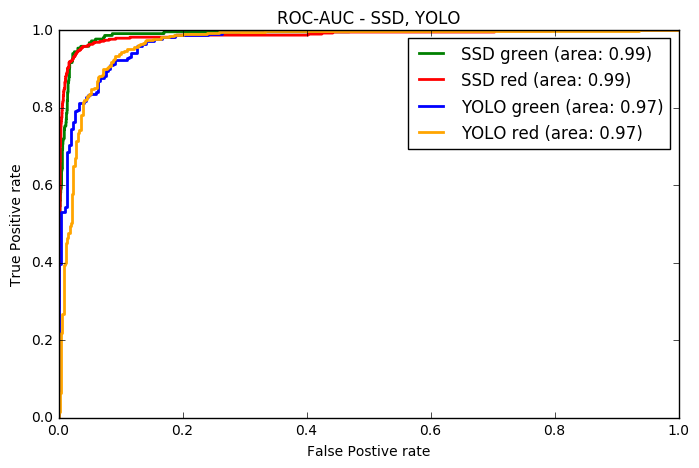

In [183]:
plt.plot(x_ssd_g, y_ssd_g, lw=2, color='green', label = 'SSD green (area: %0.2f)'% area_ssd_g)
plt.plot(x_ssd_r, y_ssd_r, lw=2, color='red', label = 'SSD red (area: %0.2f)' % area_ssd_r)
plt.plot(x_yolo_g, y_yolo_g, lw=2, color='blue', label = 'YOLO green (area: %0.2f)' % area_yolo_g)
plt.plot(x_yolo_r, y_yolo_r, lw=2, color='orange', label = 'YOLO red (area: %0.2f)' % area_yolo_r)
plt.xlabel("False Postive rate")
plt.ylabel("True Positive rate")
plt.title("ROC-AUC - SSD, YOLO")
plt.legend()

#### Analysis between model trained with data augmentation and model trained without data augementation

In [6]:
# Loading the files for the model SSD 300x300 trained with data augmentation for class red
cachedir_aug ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

rec_r_aug, prec_r_aug, ap_r_aug,tp_array_ssdr_aug, fp_array_ssdr_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir_aug, ovthresh=0.5, use_07_metric=False)

In [7]:
# Loading the files for the model SSD 300x300 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_green.txt'

rec_g_aug, prec_g_aug, ap_g_aug,tp_array_ssdg_aug, fp_array_ssdg_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [8]:
print ap_r_aug, ap_g_aug, (ap_r_aug + ap_g_aug)/2

0.846247534342 0.829019188667 0.837633361505


In [11]:
# Loading the files for the model SSD 300x300 trained without data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_noaug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score/Main/comp4_det_test_red.txt'

rec_r_noaug, prec_r_noaug, ap_r_noaug,tp_array_ssdr_noaug, fp_array_ssdr_noaug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_noaug/annots.pkl


In [12]:
# Loading the files for the model SSD 300x300 trained without data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_noaug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score/Main/comp4_det_test_green.txt'

rec_g_noaug, prec_g_noaug, ap_g_noaug,tp_array_ssdg_noaug, fp_array_ssdg_noaug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

Reading annotation for 1/294
Reading annotation for 101/294
Reading annotation for 201/294
Saving cached annotations to /home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_noaug/annots.pkl


In [13]:
print ap_r_noaug, ap_g_noaug, (ap_r_noaug + ap_g_noaug)/2

0.845327481992 0.831307450598 0.838317466295


In [49]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

In [199]:
map_values_ssd

[0.83763336150451451, 0.88038571378729347, 0.88153830941213007]

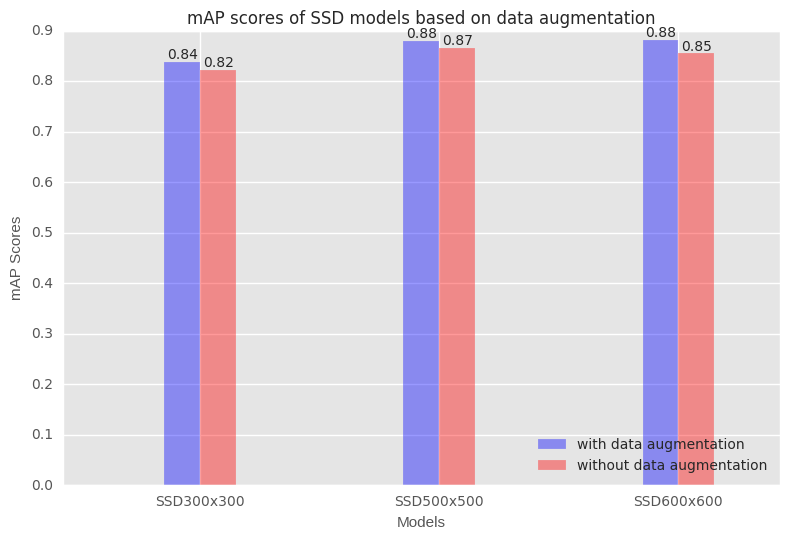

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 

fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.15

ssd_with_aug = map_values_ssd #These values are calculated in the later cells
ssd_no_aug = [0.823, 0.866, 0.855]

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, ssd_with_aug, bar_width,
                 alpha=opacity,align='center',
                 color='b',
                 label='with data augmentation')

rects2 = plt.bar(index + bar_width, ssd_no_aug, bar_width,
                 alpha=opacity,align='center',
                 color='r',
                 label='without data augmentation')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xlabel('Models')
plt.ylabel('mAP Scores')
plt.title('mAP scores of SSD models based on data augmentation')
plt.xticks(index + bar_width / 2, ('SSD300x300', 'SSD500x500', 'SSD600x600'))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('SSD_with_without_augmentation.png', bbox_inches='tight')
plt.show()


### Scores of all the SSD models which are 300x300, 500x500, 600x600 (all these models were trained with data augmentation)

In [9]:
map_values_ssd = []

#Loading the detections of 300x300

# Loading the files for the model SSD 300x300 trained with data augmentation for class red
cachedir_aug ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

rec_r_aug, prec_r_aug, ap_r_aug,tp_array_ssdr_aug, fp_array_ssdr_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir_aug, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 300x300 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_green.txt'

rec_g_aug, prec_g_aug, ap_g_aug,tp_array_ssdg_aug, fp_array_ssdg_aug = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [10]:
def compute_avg(a1,a2):
    return (a1+a2)/2

In [11]:
map_values_ssd.append(compute_avg(ap_r_aug, ap_g_aug))

In [12]:
#Loading the detections of 500x500

# Loading the files for the model SSD 500x500 trained with data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir500'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_500x500_score/Main/comp4_det_test_red.txt'

rec_r_500, prec_r_500, ap_r_500,tp_array_ssdr_500, fp_array_ssdr_500 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 500x500 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir500/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_500x500_score/Main/comp4_det_test_green.txt'

rec_g_500, prec_g_500, ap_g_500,tp_array_ssdg_500, fp_array_ssdg_500 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [13]:
map_values_ssd.append(compute_avg(ap_r_500, ap_g_500))

In [14]:
map_values_ssd

[0.83763336150451451, 0.88038571378729347]

In [15]:
#Loading the detections of 600x600

# Loading the files for the model SSD 600x600 trained with data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir600'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_red.txt'

rec_r_600, prec_r_600, ap_r_600,tp_array_ssdr_600, fp_array_ssdr_600 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 600x600 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir600/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_green.txt'

rec_g_600, prec_g_600, ap_g_600,tp_array_ssdg_600, fp_array_ssdg_600 = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [16]:
map_values_ssd.append(compute_avg(ap_r_600, ap_g_600))

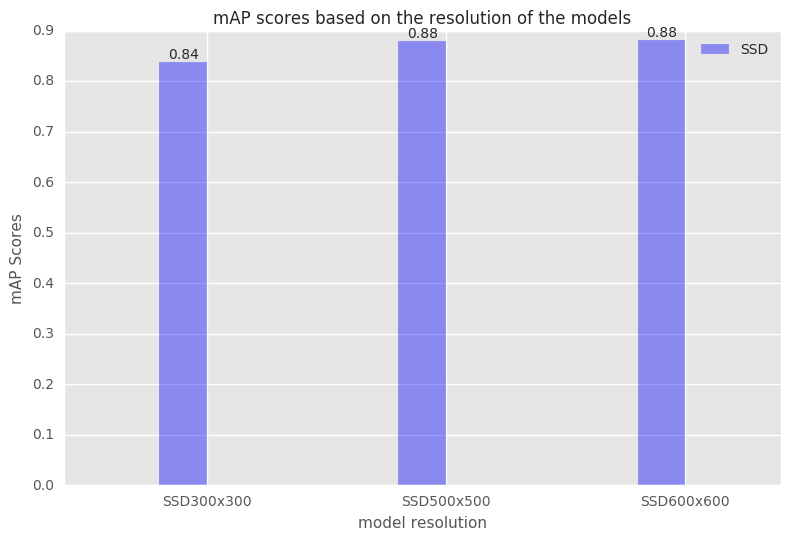

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 


index = np.arange(len(map_values_ssd))
bar_width = 0.2

opacity = 0.4

#fig, ax = plt.figure()

rects = plt.bar(index, map_values_ssd, bar_width,
                 alpha=opacity, align='center',
                 color='b',
                 label='SSD')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects)

plt.xlabel('model resolution')
plt.ylabel('mAP Scores')
plt.title('mAP scores based on the resolution of the models')
plt.xticks(index + bar_width / 2, ('SSD300x300', 'SSD500x500', 'SSD600x600'))
plt.legend()

plt.tight_layout()
plt.savefig('SSD_sizesvsmap.png', bbox_inches='tight')
plt.show()

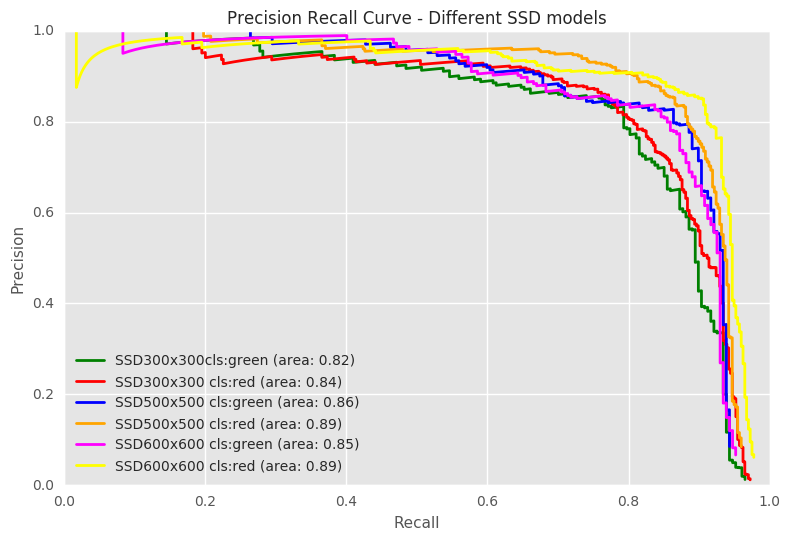

In [49]:
# ##ROC curves
# #loading true postive and false postive values of model SSD 300x300 
# x_ssd_g_300 = fp_array_ssdg_aug/np.max(fp_array_ssdg_aug)
# y_ssd_g_300 = tp_array_ssdg_aug/np.max(tp_array_ssdg_aug)
# x_ssd_r_300 = fp_array_ssdr_aug/np.max(fp_array_ssdr_aug)
# y_ssd_r_300 = tp_array_ssdr_aug/np.max(tp_array_ssdr_aug)

# #loading true positive and false postive values of model SSD 500x500
# x_ssd_g_500 = fp_array_ssdg_500/np.max(fp_array_ssdg_500)
# y_ssd_g_500 = tp_array_ssdg_500/np.max(tp_array_ssdg_500)
# x_ssd_r_500 = fp_array_ssdr_500/np.max(fp_array_ssdr_500)
# y_ssd_r_500 = tp_array_ssdr_500/np.max(tp_array_ssdr_500)

# #loaing true postive and false positive values of model SSD 600x600
# x_ssd_g_600 = fp_array_ssdg_600/np.max(fp_array_ssdg_600)
# y_ssd_g_600 = tp_array_ssdg_600/np.max(tp_array_ssdg_600)
# x_ssd_r_600 = fp_array_ssdr_600/np.max(fp_array_ssdr_600)
# y_ssd_r_600 = tp_array_ssdr_600/np.max(tp_array_ssdr_600)


#Code to calculate the area of the curves for different SSD models
from sklearn.metrics import auc

area_ssd_g_300 = auc(rec_g_aug, prec_g_aug)
area_ssd_r_300 = auc(rec_r_aug, prec_r_aug)

area_ssd_g_500 = auc(rec_g_500, prec_g_500)
area_ssd_r_500 = auc(rec_r_500, prec_r_500)

area_ssd_g_600 = auc(rec_g_600, prec_g_600)
area_ssd_r_600 = auc(rec_r_600, prec_r_600)

#Code to plot the precision recall curves 

plt.plot(rec_g_aug, prec_g_aug, lw=2, color='green', label = 'SSD300x300cls:green (area: %0.2f)'% area_ssd_g_300)
plt.plot(rec_r_aug, prec_r_aug, lw=2, color='red', label = 'SSD300x300 cls:red (area: %0.2f)' % area_ssd_r_300)
plt.plot(rec_g_500, prec_g_500, lw=2, color='blue', label = 'SSD500x500 cls:green (area: %0.2f)' % area_ssd_g_500)
plt.plot(rec_r_500, prec_r_500, lw=2, color='orange', label = 'SSD500x500 cls:red (area: %0.2f)' % area_ssd_r_500)
plt.plot(rec_g_600, prec_g_600, lw=2, color='magenta', label = 'SSD600x600 cls:green (area: %0.2f)' % area_ssd_g_600)
plt.plot(rec_r_600, prec_r_600, lw=2, color='yellow', label = 'SSD600x600 cls:red (area: %0.2f)' % area_ssd_r_600)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve - Different SSD models")
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('prec_rec_all_ssd.png', bbox_inches='tight')

### calculating map values for yolov2

In [17]:
# yolo 416x416 for the class red

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo416_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/416_416_dets/comp4_det_test_red.txt'

rec_r_yolo, prec_r_yolo, ap_r_yolo, tp_yolo_r, fp_yolo_r   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 416x416 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo416_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/416_416_dets/comp4_det_test_green.txt'

rec_g_yolo, prec_g_yolo, ap_g_yolo, tp_yolo_g, fp_yolo_g   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [18]:
#loading files foe real 416x416 yolov2 without enhancement
cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo_real_416_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/new_416_416_dets/comp4_det_test_red.txt'

rec_r_yolo416, prec_r_yolo416, ap_r_yolo416, tp_yolo_r416, fp_yolo_r416   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 416x416 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo_real_416_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/new_416_416_dets/comp4_det_test_green.txt'

rec_g_yolo416, prec_g_yolo416, ap_g_yolo416, tp_yolo_g416, fp_yolo_g416   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [19]:
compute_avg(ap_r_yolo416, ap_g_yolo416)

0.87699651170259663

In [223]:
ap_r_yolo416, ap_g_yolo416

(0.65141581386763137, 0.61913256354085577)

In [212]:
ap_r_yolo, ap_g_yolo

(0.92406961027241707, 0.93139522812730613)

In [20]:
# yolo 544x544 for the class red

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo544_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/comp4_det_test_red.txt'

rec_r_yolo544, prec_r_yolo544, ap_r_yolo544, tp_yolo544_r, fp_yolo544_r   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 544x544 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo544_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/comp4_det_test_green.txt'

rec_g_yolo544, prec_g_yolo544, ap_g_yolo544, tp_yolo544_g, fp_yolo544_g   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [21]:
# yolo 608x608 for the class red

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo608_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/latest_results/results/608_608_dets/comp4_det_test_red.txt'

rec_r_yolo608, prec_r_yolo608, ap_r_yolo608, tp_yolo608_r, fp_yolo608_r   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 608x608 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo608_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/latest_results/results/608_608_dets/comp4_det_test_green.txt'

rec_g_yolo608, prec_g_yolo608, ap_g_yolo608, tp_yolo608_g, fp_yolo608_g   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

In [3]:
(ap_r_yolo608 + ap_g_yolo608)/2

0.90114908314105735

In [4]:
ap_g_yolo608, ap_r_yolo608

(0.89591100667264523, 0.90638715960946958)

In [22]:
yolo_map_values = []
yolo_map_values.append(compute_avg(ap_r_yolo416, ap_g_yolo416))
yolo_map_values.append(compute_avg(ap_r_yolo544, ap_g_yolo544))
yolo_map_values.append(compute_avg(ap_r_yolo608, ap_g_yolo608))

In [23]:
yolo_map_values

[0.87699651170259663, 0.8901688945878572, 0.90114908314105735]

In [19]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

### graph for yolo models with different resolutions 

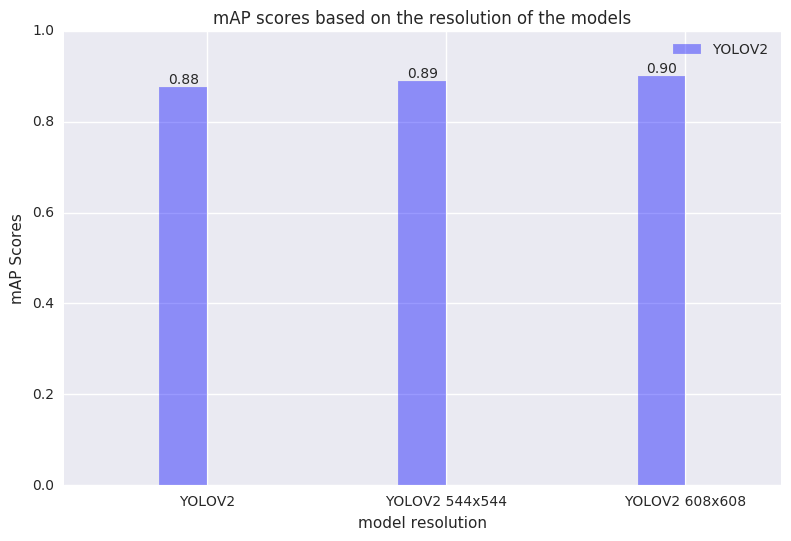

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 


index = np.arange(len(yolo_map_values))
bar_width = 0.2

opacity = 0.4

#fig, ax = plt.figure()

rects = plt.bar(index, yolo_map_values, bar_width,
                 alpha=opacity, align='center',
                 color='b',
                 label='YOLOV2')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects)

plt.xlabel('model resolution')
plt.ylabel('mAP Scores')
plt.title('mAP scores based on the resolution of the models')
plt.xticks(index + bar_width / 2, ('YOLOV2', 'YOLOV2 544x544', 'YOLOV2 608x608'))
plt.legend()

plt.tight_layout()
plt.savefig('YOLO_sizesvsmap.png', bbox_inches='tight')
plt.show()

### YOLO with and without data augmentation

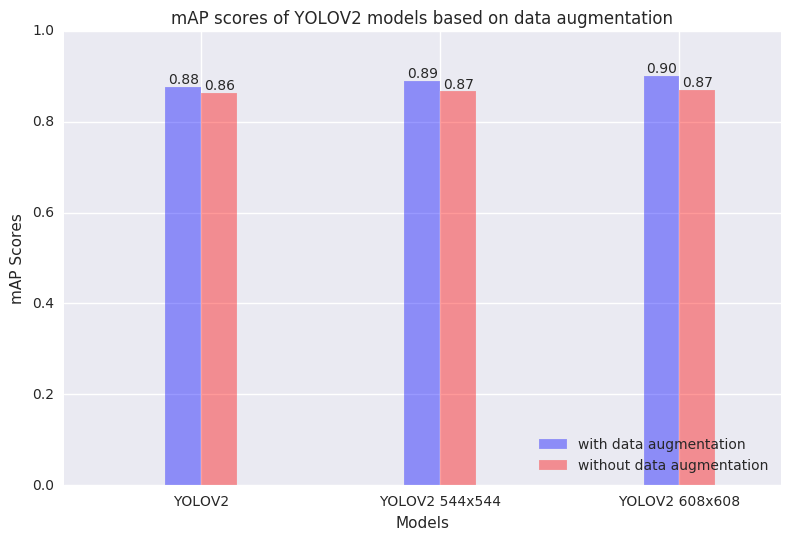

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 

fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.15

yolo_with_aug = yolo_map_values #These values are calculated in the later cells
yolo_no_aug = [0.8628, 0.8667, 0.87]

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, yolo_with_aug, bar_width,
                 alpha=opacity,align='center',
                 color='b',
                 label='with data augmentation')

rects2 = plt.bar(index + bar_width, yolo_no_aug, bar_width,
                 alpha=opacity,align='center',
                 color='r',
                 label='without data augmentation')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xlabel('Models')
plt.ylabel('mAP Scores')
plt.title('mAP scores of YOLOV2 models based on data augmentation')
plt.xticks(index + bar_width / 2, ('YOLOV2', 'YOLOV2 544x544', 'YOLOV2 608x608'))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('YOLO_with_without_augmentation.png', bbox_inches='tight')
plt.show()


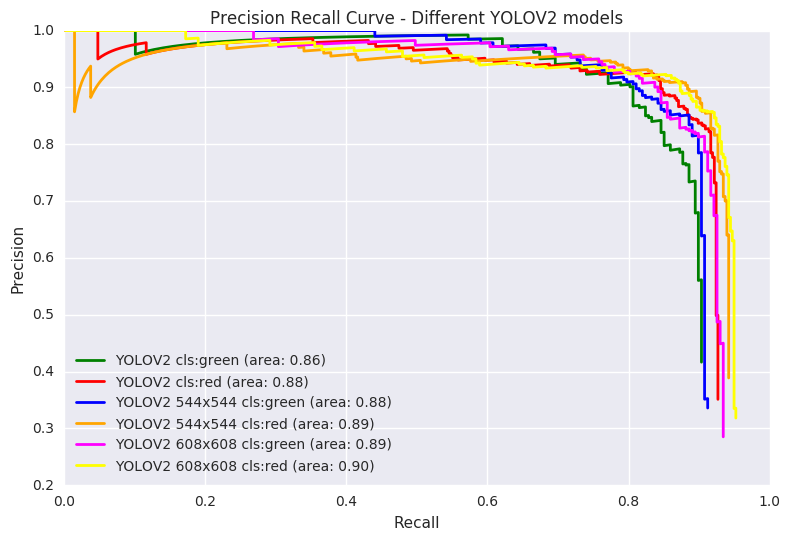

In [38]:
from sklearn.metrics import auc

area_yolo_g_416 = auc(rec_g_yolo416, prec_g_yolo416)
area_yolo_r_416 = auc(rec_r_yolo416, prec_r_yolo416)

area_yolo_g_544 = auc(rec_g_yolo544, prec_g_yolo544)
area_yolo_r_544= auc(rec_r_yolo544, prec_r_yolo544)

area_yolo_g_608 = auc(rec_g_yolo608, prec_g_yolo608)
area_yolo_r_608= auc(rec_r_yolo608, prec_r_yolo608)

#Code to plot the precision recall curves 

plt.plot(rec_g_yolo416, prec_g_yolo416, lw=2, color='green', label = 'YOLOV2 cls:green (area: %0.2f)'% area_yolo_g_416)
plt.plot(rec_r_yolo416, prec_r_yolo416, lw=2, color='red', label = 'YOLOV2 cls:red (area: %0.2f)' % area_yolo_r_416)
plt.plot(rec_g_yolo544, prec_g_yolo544, lw=2, color='blue', label = 'YOLOV2 544x544 cls:green (area: %0.2f)' % area_yolo_g_544)
plt.plot(rec_r_yolo544, prec_r_yolo544, lw=2, color='orange', label = 'YOLOV2 544x544 cls:red (area: %0.2f)' % area_yolo_r_544)
plt.plot(rec_g_yolo608, prec_g_yolo608, lw=2, color='magenta', label = 'YOLOV2 608x608 cls:green (area: %0.2f)' % area_yolo_g_608)
plt.plot(rec_r_yolo608, prec_r_yolo608, lw=2, color='yellow', label = 'YOLOV2 608x608 cls:red (area: %0.2f)' % area_yolo_r_608)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve - Different YOLOV2 models")
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('prec_rec_all_yolo.png', bbox_inches='tight')

#### YOLOV2 VS SSD

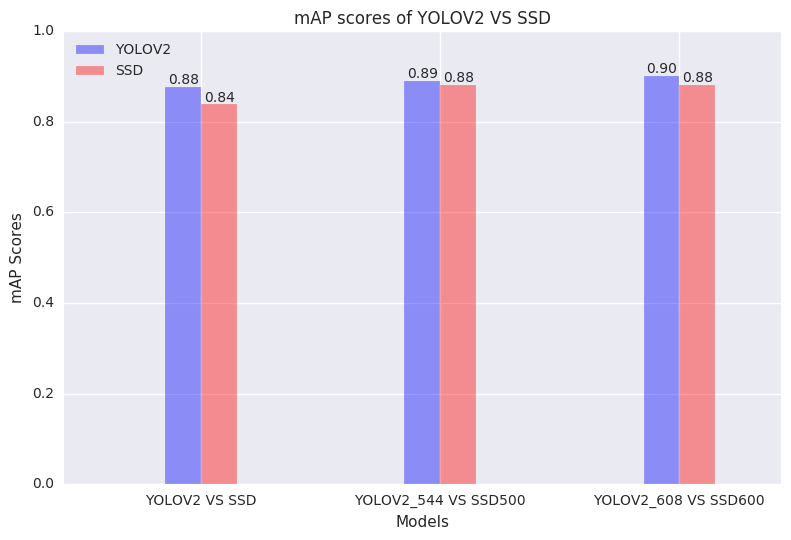

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 

fig, ax = plt.subplots()

index = np.arange(3)
bar_width = 0.15

yolo  = yolo_map_values #These values are calculated in the later cells
ssd = map_values_ssd

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, yolo, bar_width,
                 alpha=opacity,align='center',
                 color='b',
                 label='YOLOV2')

rects2 = plt.bar(index + bar_width, ssd, bar_width,
                 alpha=opacity,align='center',
                 color='r',
                 label='SSD')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%.2f' % (height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.xlabel('Models')
plt.ylabel('mAP Scores')
plt.title('mAP scores of YOLOV2 VS SSD')
plt.xticks(index + bar_width / 2, ('YOLOV2 VS SSD', 'YOLOV2_544 VS SSD500', 'YOLOV2_608 VS SSD600'))
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('YOLO_VS_SSD.png', bbox_inches='tight')
plt.show()


### Background and false positive analysis

In [1]:
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

In [3]:
with open(detpath, 'r') as ssd_300_dets:
    for each_line in ssd_300_dets:
        print each_line

0b560e12ad75741267575d4d53db7a2b 0.278322 233 92 241 111

0b560e12ad75741267575d4d53db7a2b 0.274264 235 141 241 150

0b560e12ad75741267575d4d53db7a2b 0.208614 248 141 256 153

0b560e12ad75741267575d4d53db7a2b 0.162505 232 136 242 145

0b560e12ad75741267575d4d53db7a2b 0.149207 244 142 250 152

0b560e12ad75741267575d4d53db7a2b 0.144339 241 133 249 143

0b560e12ad75741267575d4d53db7a2b 0.137753 234 143 240 153

0b560e12ad75741267575d4d53db7a2b 0.124776 232 130 241 138

0b560e12ad75741267575d4d53db7a2b 0.124104 246 139 253 148

0b560e12ad75741267575d4d53db7a2b 0.119341 238 93 244 109

0b560e12ad75741267575d4d53db7a2b 0.115102 226 128 234 137

0b560e12ad75741267575d4d53db7a2b 0.113805 232 140 239 150

0b560e12ad75741267575d4d53db7a2b 0.10746 235 90 243 101

0b560e12ad75741267575d4d53db7a2b 0.106023 243 148 248 156

0b560e12ad75741267575d4d53db7a2b 0.105583 239 149 244 157

0b560e12ad75741267575d4d53db7a2b 0.104184 233 149 238 156

0b560e12ad75741267575d4d53db7a2b 0.102647 276 141 282 152

0

In [4]:
each_line

'0d59a0071be9653f43b8587c0842c1f7 0.0208312 238 45 244 57\n'

#### Things to do
    1. Get number of boxes app in single image
    2. Get the dets localization errors
    3. Get the background dets

#### Types of false postives
    1. Localization error (True class and IOU < 0.5)
    2. Other (class is wrong IOU > 0.1)
    3. Background (any class IOU < 0.1)

In [1]:
import pickle

In [2]:
imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt' #names of the test file, one test file per row
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/' #annotations directory
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

In [3]:
import xml.etree.ElementTree as ET

[{'bbox': [231, 28, 243, 54],
  'difficult': 0,
  'name': 'red',
  'pose': 'Unspecified',
  'truncated': 0},
 {'bbox': [342, 34, 356, 60],
  'difficult': 0,
  'name': 'red',
  'pose': 'Unspecified',
  'truncated': 0}]

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(detpath, sep=' ', names=['fname', 'score', 'xmin', 'ymin', 'xmax', 'ymax'])

In [6]:
is_bgrnd = df['score'] < 0.1
df['is_bgrnd'] = is_bgrnd
df.head(5)

,fname,score,xmin,ymin,xmax,ymax,is_bgrnd
0,0b560e12ad75741267575d4d53db7a2b,0.278322,233,92,241,111,False
1,0b560e12ad75741267575d4d53db7a2b,0.274264,235,141,241,150,False
2,0b560e12ad75741267575d4d53db7a2b,0.208614,248,141,256,153,False
3,0b560e12ad75741267575d4d53db7a2b,0.162505,232,136,242,145,False
4,0b560e12ad75741267575d4d53db7a2b,0.149207,244,142,250,152,False


In [37]:
temp_df = df[df.fname == df.fname[0]].sort_values('score', ascending=True)

In [7]:
df.is_bgrnd.value_counts()

True     29714
False     1928
Name: is_bgrnd, dtype: int64

In [ ]:
for each_index in range(len(df.fname)):
    fname = df.fname[each_index]
    with open(annopath+fname+'.xml', 'r') as to_parse:
    tree = ET.parse(to_parse)
    root = tree.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls == 'red':
            

In [8]:
index, cols = df[df.fname == '0b560e12ad75741267575d4d53db7a2b'].shape
index = index - 1


In [9]:
 (df[df.fname == '0b560e12ad75741267575d4d53db7a2b'].score > 0.5).value_counts()

False    165
Name: score, dtype: int64

In [10]:
len(df.fname)

31642

In [11]:
df.fname[0]
import numpy as np

In [12]:
thrsh = 0.5
with open(annopath+df.fname[0]+'.xml', 'r') as to_parse:
    tree = ET.parse(to_parse)
    root = tree.getroot()
    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls == 'red':
            xmlbox = obj.find('bndbox')
            b = (float(xmlbox.find('xmin').text), float(xmlbox.find('ymin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymax').text))
            print b

(232.0, 93.0, 242.0, 113.0)


In [14]:
ixmin = np.maximum(np.array(df[df.fname == df.fname[0]].ix[:,'xmin':'ymax'])[:,0], b[0])
iymin = np.maximum(np.array(df[df.fname == df.fname[0]].ix[:, 'xmin': 'ymax'])[:,1], b[1])
ixmax = np.maximum(np.array(df[df.fname == df.fname[0]].ix[:, 'xmin': 'ymax'])[:,2], b[2])
iymax = np.maximum(np.array(df[df.fname == df.fname[0]].ix[:, 'xmin': 'ymax'])[:,3], b[3])

In [15]:
iw = np.maximum(ixmax - ixmin + 1., 0.)
ih = np.maximum(iymax - iymin + 1., 0.)

In [18]:
inters = iw * ih

In [21]:
uni = ((b[2] - b[0] + 1.) * (b[3] - b[1] + 1.) +
                   (np.array(df[df.fname == df.fname[0]].ix[:, 'xmin': 'ymax'])[:,2] - np.array(df[df.fname == df.fname[0]].ix[:,'xmin':'ymax'])[:,0] + 1.) *
                   (np.array(df[df.fname == df.fname[0]].ix[:, 'xmin': 'ymax'])[:,3] - np.array(df[df.fname == df.fname[0]].ix[:, 'xmin': 'ymax'])[:,1] + 1.) - inters)

In [23]:
overlaps = inters / uni
ovmax = np.max(overlaps)
jmax = np.argmax(overlaps)

In [26]:
jmax

142

In [27]:
df.ix[142]

fname       0b560e12ad75741267575d4d53db7a2b
score                              0.0238442
xmin                                     321
ymin                                       0
xmax                                     337
ymax                                      11
is_bgrnd                                True
Name: 142, dtype: object

In [20]:
uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                   (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                   (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)

            overlaps = inters / uni
            ovmax = np.max(overlaps)
            jmax = np.argmax(overlaps)

array([ 210.,   80.,  117.,  110.,   77.,   99.,   99.,   99.,   80.,
        147.,  110.,  121.,  189.,   54.,   54.,   80.,   84.,  209.,
         96.,   99.,   70.,   77.,   40.,   96.,  110.,  120.,   77.,
         99.,  189.,   70.,   60.,   99.,  154.,  110.,   96.,   66.,
        121.,   48.,   72.,  462.,  110.,  110.,   88.,   54.,  231.,
        132.,  144.,  132.,   88.,   54.,   80.,   98.,   77.,  120.,
        231.,  121.,  420.,   54.,   99.,  105.,   84.,   77.,  231.,
        110.,  231.,   60.,   88.,   63.,   40.,  147.,  121.,   50.,
        231.,  189.,   60.,   45.,   60.,  189.,  189.,  110.,   48.,
        135.,  483.,  132.,  231.,  231.,  231.,  231.,   64.,   45.,
         88.,   35.,  176.,   99.,  168.,   72.,   48.,   35.,   60.,
         84.,   78.,  189.,   60.,   88.,  154.,   77.,   40.,   45.,
         88.,  187.,  231.,  110.,  168.,   70.,   40.,   99.,   99.,
         88.,   35.,  121.,   35.,   40.,  231.,  378.,  132.,   40.,
         78.,   66.,

In [ ]:
ixmin = np.maximum(BBGT[:, 0], bb[0])
iymin = np.maximum(BBGT[:, 1], bb[1])
ixmax = np.minimum(BBGT[:, 2], bb[2])
iymax = np.minimum(BBGT[:, 3], bb[3])
iw = np.maximum(ixmax - ixmin + 1., 0.)
ih = np.maximum(iymax - iymin + 1., 0.)
inters = iw * ih



            

In [52]:
np.maximum(annot_real[:,0], test_Array[:,0])

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [54]:
np.maximum([1,2,3,4], [5,7])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [143]:
import xml.etree.ElementTree as ET
import os
import cPickle
import numpy as np



def parse_rec(filename):
    """ Parse a PASCAL VOC xml file """
    tree = ET.parse(filename)
    objects = []
    for obj in tree.findall('object'):
        obj_struct = {}
        obj_struct['name'] = obj.find('name').text
        obj_struct['pose'] = obj.find('pose').text
        obj_struct['truncated'] = int(obj.find('truncated').text)
        obj_struct['difficult'] = int(obj.find('difficult').text)
        bbox = obj.find('bndbox')
        obj_struct['bbox'] = [int(bbox.find('xmin').text),
                              int(bbox.find('ymin').text),
                              int(bbox.find('xmax').text),
                              int(bbox.find('ymax').text)]
        objects.append(obj_struct)

    return objects

def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation
        # first append sentinel values at the end
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

def voc_eval(detpath,
             annopath,
             imagesetfile,
             classname,
             cachedir,
             ovthresh=0.5,
             use_07_metric=False):
    """rec, prec, ap = voc_eval(detpath,
                                annopath,
                                imagesetfile,
                                classname,
                                [ovthresh],
                                [use_07_metric])

    Top level function that does the PASCAL VOC evaluation.

    detpath: Path to detections
        detpath.format(classname) should produce the detection results file.
    annopath: Path to annotations
        annopath.format(imagename) should be the xml annotations file.
    imagesetfile: Text file containing the list of images, one image per line.
    classname: Category name (duh)
    cachedir: Directory for caching the annotations
    [ovthresh]: Overlap threshold (default = 0.5)
    [use_07_metric]: Whether to use VOC07's 11 point AP computation
        (default False)
    """
    # assumes detections are in detpath.format(classname)
    # assumes annotations are in annopath.format(imagename)
    # assumes imagesetfile is a text file with each line an image name
    # cachedir caches the annotations in a pickle file

    # first load gt
    if not os.path.isdir(cachedir):
        os.mkdir(cachedir)
    cachefile = os.path.join(cachedir, 'annots.pkl')
    # read list of images
    with open(imagesetfile, 'r') as f:
        lines = f.readlines()
    imagenames = [x.strip() for x in lines]

    if not os.path.isfile(cachefile):
        # load annots
        recs = {}
        for i, imagename in enumerate(imagenames):
            #print imagename, annopath.format(imagename)
            #recs[imagename] = parse_rec(annopath.format(imagename))
            recs[imagename] = parse_rec(annopath+imagename+'.xml')
            if i % 100 == 0:
                print 'Reading annotation for {:d}/{:d}'.format(
                    i + 1, len(imagenames))
        # save
        print 'Saving cached annotations to {:s}'.format(cachefile)
        with open(cachefile, 'w') as f:
            cPickle.dump(recs, f)
    else:
        # load
        with open(cachefile, 'r') as f:
            recs = cPickle.load(f)

    # extract gt objects for this class
    class_recs = {}
    npos = 0
    for imagename in imagenames:
        R = [obj for obj in recs[imagename] if obj['name'] == classname]
        bbox = np.array([x['bbox'] for x in R])
        difficult = np.array([x['difficult'] for x in R]).astype(np.bool)
        det = [False] * len(R)
        npos = npos + sum(~difficult)
        class_recs[imagename] = {'bbox': bbox,
                                 'difficult': difficult,
                                 'det': det}

    # read dets
    detfile = detpath.format(classname)
    with open(detfile, 'r') as f:
        lines = f.readlines()

    splitlines = [x.strip().split(' ') for x in lines]
    image_ids = [x[0] for x in splitlines]
    confidence = np.array([float(x[1]) for x in splitlines])
    BB = np.array([[float(z) for z in x[2:]] for x in splitlines])

    # sort by confidence
    sorted_ind = np.argsort(-confidence)
    sorted_scores = np.sort(-confidence)
    BB = BB[sorted_ind, :]
    image_ids = [image_ids[x] for x in sorted_ind]

    # go down dets and mark TPs and FPs
    nd = len(image_ids)
    tp = np.zeros(nd)
    fp = np.zeros(nd)
    locs_errors = 0
    background_errors = 0
    other_sims = 0
    dummies = 0

    for d in range(nd):
        R = class_recs[image_ids[d]]
        bb = BB[d, :].astype(float)
        ovmax = -np.inf
        BBGT = R['bbox'].astype(float)
        #print bb

        if BBGT.size > 0:
            # compute overlaps
            # intersection
            ixmin = np.maximum(BBGT[:, 0], bb[0])
            iymin = np.maximum(BBGT[:, 1], bb[1])
            ixmax = np.minimum(BBGT[:, 2], bb[2])
            iymax = np.minimum(BBGT[:, 3], bb[3])
            iw = np.maximum(ixmax - ixmin + 1., 0.)
            ih = np.maximum(iymax - iymin + 1., 0.)
            inters = iw * ih
            #print inters.shape

            # union
            uni = ((bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) +
                   (BBGT[:, 2] - BBGT[:, 0] + 1.) *
                   (BBGT[:, 3] - BBGT[:, 1] + 1.) - inters)
            #print uni.shape

            overlaps = inters / uni
            #print overlaps
            
            ovmax = np.max(overlaps)
            jmax = np.argmax(overlaps)
        
        if ovmax > 0.2 and ovmax < 0.5:
            locs_errors += 1
        if ovmax > 0.1 and ovmax < 0.2:
            other_sims += 1
        if ovmax > 0.01 and ovmax <= 0.1:
            background_errors += 1
        if ovmax < 0.01:
            dummies += 1


        if ovmax > ovthresh:
            if not R['difficult'][jmax]:
                if not R['det'][jmax]:
                    tp[d] = 1.
                    R['det'][jmax] = 1
                else:
                    fp[d] = 1.
        else:
            fp[d] = 1.
        
        
            

    # compute precision recall
    tp_array = tp
    fp_array = fp
    fp = np.cumsum(fp)
    tp = np.cumsum(tp)
    rec = tp / float(npos)
    print npos
    # avoid divide by zero in case the first detection matches a difficult
    # ground truth
    prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
    ap = voc_ap(rec, prec, use_07_metric)

    return rec, prec, ap, tp_array, fp_array, locs_errors, background_errors, dummies, other_sims, nd

### False positive analysis for SSD 300X300

In [206]:
cachedir_aug ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_red.txt'

rec_r_aug, prec_r_aug, ap_r_aug,tp_array_ssdr_aug, fp_array_ssdr_aug, loc_errors_r, backs_r, dummies_r, sims_r, total_r = voc_eval(detpath, annopath, imagesetfile, classname, cachedir_aug, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 300x300 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir_300_aug/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_300x300_score_with_augmentation/Main/comp4_det_test_green.txt'

rec_g_aug, prec_g_aug, ap_g_aug,tp_array_ssdg_aug, fp_array_ssdg_aug, loc_errors_g, backs_g, dummies_g, sims_g, total_g = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

394
227


### False positive analysis for SSD 500X500

In [175]:
#Loading the detections of 500x500

# Loading the files for the model SSD 500x500 trained with data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir500'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_500x500_score/Main/comp4_det_test_red.txt'

rec_r_500, prec_r_500, ap_r_500,tp_array_ssdr_500, fp_array_ssdr_500, loc_errors_ssdr_500, backs_ssdr_500, dummies, sims_ssdr_500, total = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 500x500 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir500/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_500x500_score/Main/comp4_det_test_green.txt'

rec_g_500, prec_g_500, ap_g_500,tp_array_ssdg_500, fp_array_ssdg_500, loc_errors_ssdg_500, backs_ssdg_500, dummies, sims_ssdg_500, total = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

394
227


### False positive analysis for SSD 600X600

In [178]:
#Loading the detections of 600x600

# Loading the files for the model SSD 600x600 trained with data augmentation for class red
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cred_dir600'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_red.txt'

rec_r_600, prec_r_600, ap_r_600,tp_array_ssdr_600, fp_array_ssdr_600, loc_errors_ssdr_600, backs_ssdr_600, dummies, sims_ssdr_600, total  = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)


# Loading the files for the model SSD 600x600 trained with data augmentation for class green
cachedir ='/home/saikiran/HBRS/RD/actual_data/ssd_cgreen_dir600/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/SSD_600x600_score/Main/comp4_det_test_green.txt'

rec_g_600, prec_g_600, ap_g_600,tp_array_ssdg_600, fp_array_ssdg_600, loc_errors_ssdg_600, backs_ssdg_600, dummies, sims_ssdg_600, total = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

394
227


### False positive analysis for YOLO 416X416

In [181]:
#loading files foe real 416x416 yolov2 without enhancement
cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo_real_416_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/new_416_416_dets/comp4_det_test_red.txt'

rec_r_yolo416, prec_r_yolo416, ap_r_yolo416, tp_yolo_r416, fp_yolo_r416, loc_errors_yolo_r416, backs_yolo_r416, dummies, sims_yolo_r416, total   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 416x416 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo_real_416_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/new_416_416_dets/comp4_det_test_green.txt'

rec_g_yolo416, prec_g_yolo416, ap_g_yolo416, tp_yolo_g416, fp_yolo_g416, loc_errors_yolo_g416, backs_yolo_g416, dummies, sims_yolo_g416, total   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

394
227


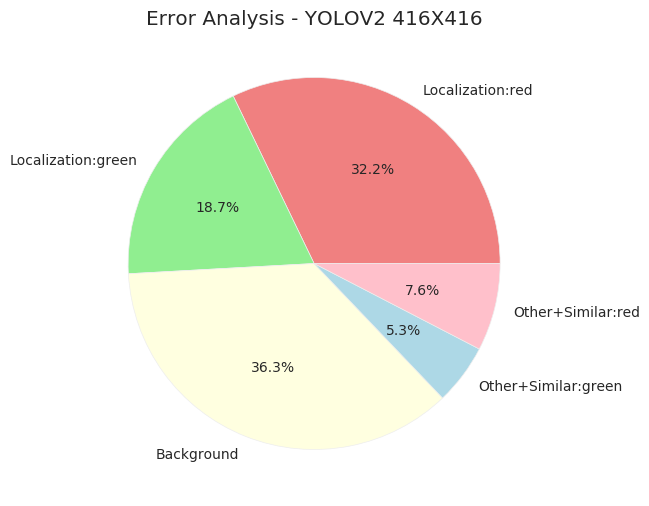

In [233]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
plt.style.use('bmh')
plt.pie([loc_errors_yolo_r416, loc_errors_yolo_g416, backs_yolo_g416+backs_yolo_r416, sims_yolo_g416, sims_yolo_r416], labels = ['Localization:red','Localization:green', 'Background', 'Other+Similar:green', 'Other+Similar:red'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'pink'])
plt.title('Error Analysis - YOLOV2 416X416', **csfont)
plt.savefig('FP_analysis_YOLO416.png', bbox_inches='tight')

### False positive analysis for YOLOV2 544X544

In [184]:
# yolo 544x544 for the class red

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo544_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/comp4_det_test_red.txt'

rec_r_yolo544, prec_r_yolo544, ap_r_yolo544, tp_yolo544_r, fp_yolo544_r, loc_errors_yolo_r544, backs_yolo_r544, dummies, sims_yolo_r544, total   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 544x544 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo544_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/results/comp4_det_test_green.txt'

rec_g_yolo544, prec_g_yolo544, ap_g_yolo544, tp_yolo544_g, fp_yolo544_g, loc_errors_yolo_g544, backs_yolo_g544, dummies, sims_yolo_g544, total   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

394
227


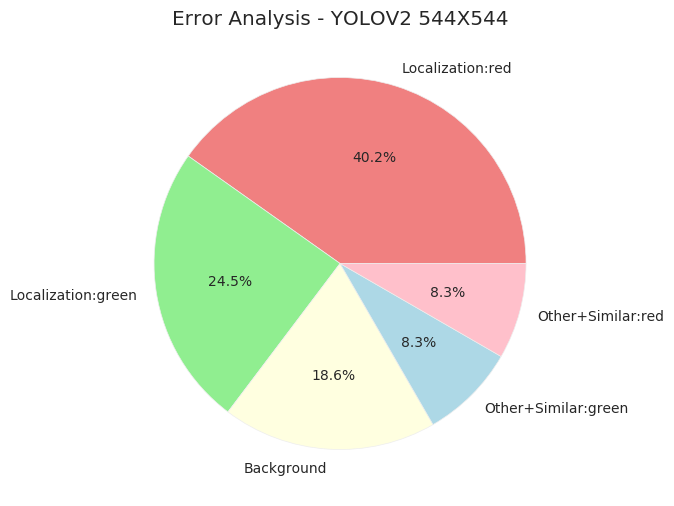

In [232]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
plt.style.use('bmh')
plt.pie([loc_errors_yolo_r544, loc_errors_yolo_g544, backs_yolo_g544+backs_yolo_r544, sims_yolo_g544, sims_yolo_r544], labels = ['Localization:red','Localization:green', 'Background', 'Other+Similar:green', 'Other+Similar:red'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'pink'])
plt.title('Error Analysis - YOLOV2 544X544', **csfont)
plt.savefig('FP_analysis_YOLO544.png', bbox_inches='tight')

### False positive analysis for YOLOV2 608X608

In [195]:
# yolo 608x608 for the class red

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo608_r/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'red'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/latest_results/results/608_608_dets/comp4_det_test_red.txt'

rec_r_yolo608, prec_r_yolo608, ap_r_yolo608, tp_yolo608_r, fp_yolo608_r, loc_errors_yolo_r608, backs_yolo_r608, dummies, sims_yolo_r608, total   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

# yolo 608x608 for class green

cachedir ='/home/saikiran/HBRS/RD/actual_data/cdir_yolo608_g/'

imagesetfile = '/home/saikiran/HBRS/RD/actual_data/results/new_test.txt'
classname = 'green'
annopath = '/home/saikiran/HBRS/RD/actual_data/test_labels/'
detpath = '/home/saikiran/HBRS/RD/actual_data/results/results_yolo_dets/latest_results/results/608_608_dets/comp4_det_test_green.txt'

rec_g_yolo608, prec_g_yolo608, ap_g_yolo608, tp_yolo608_g, fp_yolo608_g, loc_errors_yolo_g608, backs_yolo_g608, dummies, sims_yolo_g608, total   = voc_eval(detpath, annopath, imagesetfile, classname, cachedir, ovthresh=0.5, use_07_metric=False)

394
227


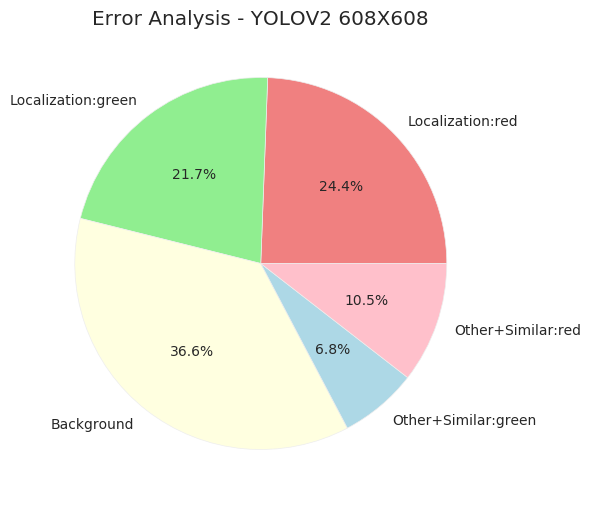

In [231]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
plt.style.use('bmh')
plt.pie([loc_errors_yolo_r608, loc_errors_yolo_g608, backs_yolo_g608+backs_yolo_r608, sims_yolo_g608, sims_yolo_r608], labels = ['Localization:red','Localization:green', 'Background', 'Other+Similar:green', 'Other+Similar:red'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'pink'])
plt.title('Error Analysis - YOLOV2 608X608', **csfont)
plt.savefig('FP_analysis_YOLO608.png', bbox_inches='tight')

In [145]:
loc_errors, backs, sims, dummies, total

(1416, 1123, 842, 27750, 31642)

In [146]:
383 + 1416 + 1123 + 842 + 27750

31514

In [151]:
383.0/393

0.9745547073791349

In [80]:
df.shape

(31642, 7)

In [107]:
tp = np.sum(tp_array_ssdr_aug)

In [108]:
fp = np.sum(fp_array_ssdr_aug)

In [106]:
loc_errors + backs - total

-512

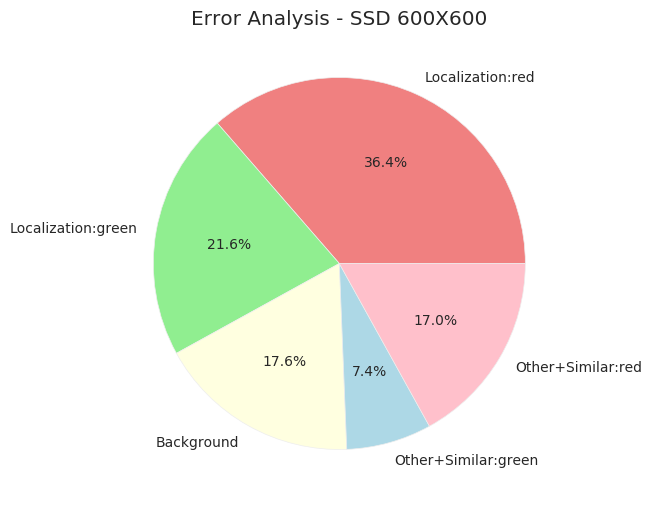

In [230]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
plt.style.use('bmh')
plt.pie([loc_errors_ssdr_600, loc_errors_ssdg_600, backs_ssdg_600+backs_ssdr_600, sims_ssdg_600, sims_ssdr_600], labels = ['Localization:red','Localization:green', 'Background', 'Other+Similar:green', 'Other+Similar:red'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'pink'])
plt.title('Error Analysis - SSD 600X600', **csfont)
plt.savefig('FP_analysis_SSD600.png', bbox_inches='tight')

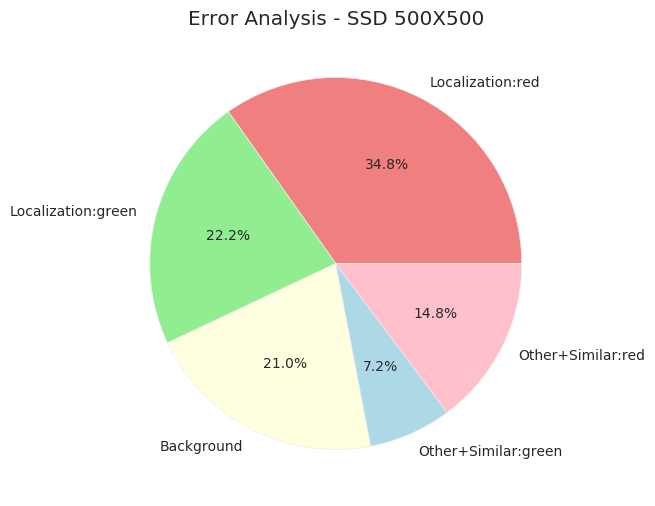

In [229]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
plt.style.use('bmh')
plt.pie([loc_errors_ssdr_500, loc_errors_ssdg_500, backs_ssdg_500+backs_ssdr_500, sims_ssdg_500, sims_ssdr_500], labels = ['Localization:red','Localization:green', 'Background', 'Other+Similar:green', 'Other+Similar:red'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'pink'])
plt.title('Error Analysis - SSD 500X500', **csfont)
plt.savefig('FP_analysis_SSD500.png', bbox_inches='tight')

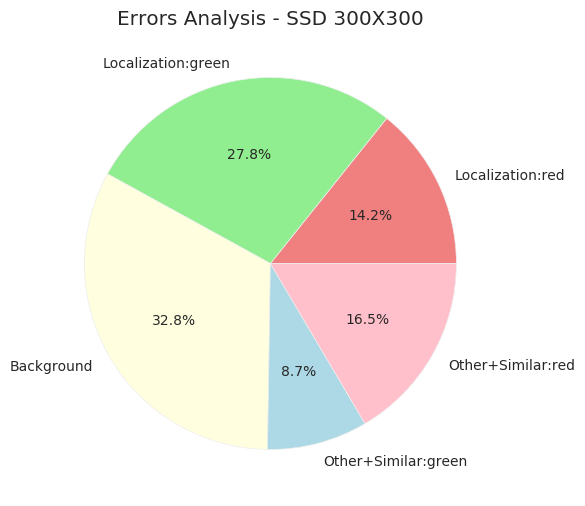

In [228]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
plt.style.use('bmh')
plt.pie([loc_errors_g, loc_errors_r, backs_g+backs_r, sims_g, sims_r], labels = ['Localization:red','Localization:green', 'Background', 'Other+Similar:green', 'Other+Similar:red'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightyellow', 'lightblue', 'pink'])
plt.title('Errors Analysis - SSD 300X300', **csfont)
plt.savefig('FP_analysis_SSD300.png', bbox_inches='tight')

In [208]:
fp_SSD_300 = loc_errors_g + loc_errors_r+backs_g+backs_r+sims_g + sims_r

In [109]:
tp/(tp+fp)

0.012104165349851464

In [113]:
np.max(np.cumsum(tp_array_ssdr_aug) + np.cumsum(fp_array_ssdr_aug))

31642.0

In [115]:
tp/31642

0.012104165349851464

In [ ]:
np.maximum(tp + fp, np.finfo(np.float64).eps)

In [117]:
import xml.etree.ElementTree as ET

all_labels = os.listdir(annopath)

In [120]:
green_count = 0
red_count = 0

for each_label in all_labels:
    with open('/home/saikiran/HBRS/RD/actual_data/test_labels/' + each_label, 'r') as to_parse:
        tree = ET.parse(to_parse)
        root = tree.getroot()
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls == 'green':
                green_count += 1
            else:
                red_count += 1

print green_count, red_count

227 394


In [126]:
tp/394

0.97208121827411165

In [119]:
all_labels

['f765433b49ccbecc957a19bebba8eae0.xml',
 '0a0eaa5ec14fbe0c7ddace2ce6d004d9.xml',
 'fa02c776030ddcdca94f8905db60faf7.xml',
 '0cbc57219e5f2b5f5a4748d4220212b7.xml',
 '02e17395037a70056716145cf61b1346.xml',
 '00c6a53c353c934810fa76a7db6873ae.xml',
 'fa8f49e896039b7d05861c597cb299df.xml',
 '00c04448a4991325b6aea10e08ca4340.xml',
 '00ec8fced1f94eed555ea333b9312051.xml',
 '00f1b0c7e3741ea98e13e9ae9dcd4333.xml',
 '0172762ad8797aecf616d9a49b7cc179.xml',
 'f880bd6ff2884dde5d1c152bb1fe1047.xml',
 '0a3ab5b0a002417d4489bebc32b3fc8d.xml',
 'f94d2adb580c6cf797436df0dfa0bb4f.xml',
 '0bb73122c9e27d4fac34d365bc809f85.xml',
 '0a65db5d46474ff26974066d3f9942e2.xml',
 '0c4eda2cf684ccbbe3556a077f9c0b4d.xml',
 '0ca4fbcb2eff59a3573fba95b9af1a63.xml',
 '0b6e9bd83287b05ae91fb29a4effa354.xml',
 '01275c0a2185a24a05c6cc4a45ba0454.xml',
 '0b7bbaf795e02212497df53c5c821f58.xml',
 '0a10ed5ad90b7488c4f2776f783b8ba7.xml',
 '0a3175bdce6b7508a78bb893c0055ef3.xml',
 '0c9faae207d8414445718b1f0d8f1d41.xml',
 '0d43c7d536d4c7

In [127]:
fp

31259.0

#### Things to do 

    1. Show some examples for localization errors in case of yolo and SSD 
    2. False positives
    3. Select some interesting cases

In [209]:
fp_SSD_500 = loc_errors_ssdr_500 + loc_errors_ssdg_500 + backs_ssdg_500+backs_ssdr_500 + sims_ssdg_500 + sims_ssdr_500

In [210]:
fp_SSD_600 = loc_errors_ssdr_600+ loc_errors_ssdg_600 + backs_ssdg_600+backs_ssdr_600 + sims_ssdg_600 + sims_ssdr_600

In [211]:
fp_YOLO_608 = loc_errors_yolo_r608 + loc_errors_yolo_g608 + backs_yolo_g608+backs_yolo_r608+ sims_yolo_g608 + sims_yolo_r608

In [212]:
fp_YOLO_544 = loc_errors_yolo_r544 + loc_errors_yolo_g544 + backs_yolo_g544+backs_yolo_r544 + sims_yolo_g544 + sims_yolo_r544

In [213]:
fp_YOLO_416 = loc_errors_yolo_r416 + loc_errors_yolo_g416 + backs_yolo_g416+backs_yolo_r416 + sims_yolo_g416 + sims_yolo_r416

In [214]:
fp_vals = [fp_SSD_300, fp_SSD_500, fp_SSD_600, fp_YOLO_416, fp_YOLO_544, fp_YOLO_608]

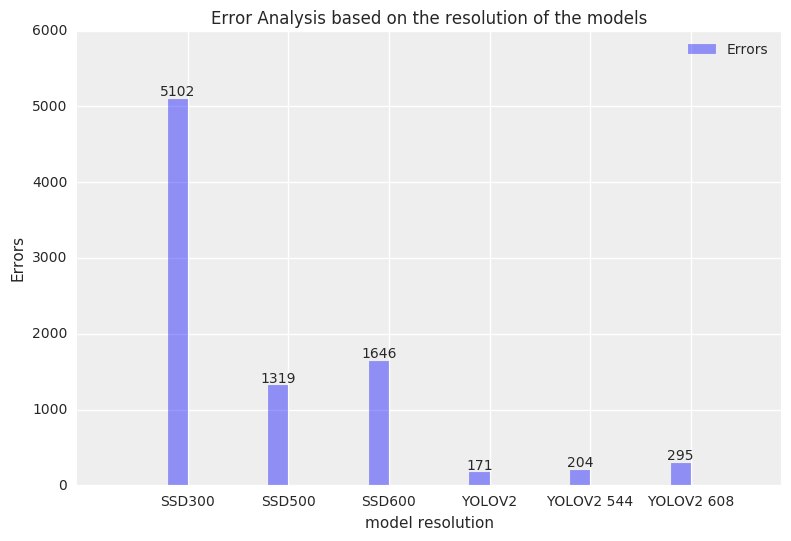

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn-notebook') 


index = np.arange(len(fp_vals))
bar_width = 0.2

opacity = 0.4

#fig, ax = plt.figure()

rects = plt.bar(index, fp_vals, bar_width,
                 alpha=opacity, align='center',
                 color='b',
                 label='Errors')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % (height),
                ha='center', va='bottom')

autolabel(rects)

plt.xlabel('model resolution')
plt.ylabel('Errors')
plt.title('Error Analysis based on the resolution of the models')
plt.xticks(index + bar_width / 2, ('SSD300', 'SSD500', 'SSD600' ,'YOLOV2', 'YOLOV2 544', 'YOLOV2 608'))
plt.legend()

plt.tight_layout()
plt.savefig('FPVSModels.png', bbox_inches='tight')
plt.show()

In [218]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']